In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [4]:
##data preprocessing
#training image preprocessing


training_set=tf.keras.utils.image_dataset_from_directory(
    'Training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(225, 225),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2870 files belonging to 4 classes.


In [5]:
###validation image preprocessing

##data preprocessing
#training image preprocessing


validation_set=tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(225, 225),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
   
    verbose=True,
)

Found 394 files belonging to 4 classes.


In [85]:
testing_set=tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(225, 225),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
   
    verbose=True,
)

Found 394 files belonging to 4 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 225, 225, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [41]:
##building model

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [42]:
model=Sequential()

In [43]:
#building convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[225,225,3]))

model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
#building convolutional layer
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
#building convolutional layer
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [46]:
#building convolutional layer
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [47]:
#building convolutional layer
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
          
model.add(MaxPool2D(pool_size=2,strides=2))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1500,activation='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
#output layer
model.add(Dense(units=4,activation='softmax'))

In [55]:
#compiling model

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 223, 223, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 52, 52, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │      19,201,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,919,728 (91.25 MB)

 Trainable params: 23,919,728 (91.25 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
##training model

training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.3993 - loss: 1.6176 - val_accuracy: 0.3731 - val_loss: 1.6736
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.6692 - loss: 0.7883 - val_accuracy: 0.4873 - val_loss: 1.7832
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.7342 - loss: 0.6157 - val_accuracy: 0.5711 - val_loss: 1.5039
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.8179 - loss: 0.4726 - val_accuracy: 0.6599 - val_loss: 1.7359
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.8694 - loss: 0.3717 - val_accuracy: 0.6929 - val_loss: 2.1591
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9077 - loss: 0.2345 - val_accuracy: 0.7360 - val_loss: 1.8421
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.9392 - loss: 0.1641 - val_accuracy: 0.7310 - val_loss: 2.3803
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9501 - loss: 0.1337 - val_accuracy: 0.7208 - v

In [58]:
#model evaluation on training set

train_loss,train_acc=model.evaluate(training_set)

90/90 ━━━━━━━━━━━━━━━━━━━━ 67s 746ms/step - accuracy: 0.9603 - loss: 0.0939


In [59]:
print(train_loss,train_acc)

0.08690621703863144 0.9644599556922913


In [60]:
#model on validation set


val_loss,val_acc=model.evaluate(validation_set)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - accuracy: 0.7450 - loss: 2.3124


In [61]:
print(val_loss,val_acc)

2.698517084121704 0.7131979465484619


In [64]:
#saving model

model.save("trained_model.keras")

In [65]:
training_history.history

{'accuracy': [0.48919859528541565,
  0.6857143044471741,
  0.7536585330963135,
  0.8188153505325317,
  0.8738675713539124,
  0.9083623886108398,
  0.9376306533813477,
  0.9522647857666016,
  0.9515679478645325,
  0.9763066172599792],
 'loss': [1.2102280855178833,
  0.7461206912994385,
  0.5867856740951538,
  0.4617213308811188,
  0.348225474357605,
  0.23866970837116241,
  0.1701904982328415,
  0.13785414397716522,
  0.12383685261011124,
  0.06856124103069305],
 'val_accuracy': [0.37309643626213074,
  0.48730963468551636,
  0.5710659623146057,
  0.6598984599113464,
  0.692893385887146,
  0.7360405921936035,
  0.7309644818305969,
  0.720812201499939,
  0.7563451528549194,
  0.7131979465484619],
 'val_loss': [1.6736258268356323,
  1.7831870317459106,
  1.5039345026016235,
  1.7358607053756714,
  2.1590781211853027,
  1.8421491384506226,
  2.3802740573883057,
  2.4641013145446777,
  2.4845495223999023,
  2.698517084121704]}

In [66]:
#recording history in json

import json

with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)
    



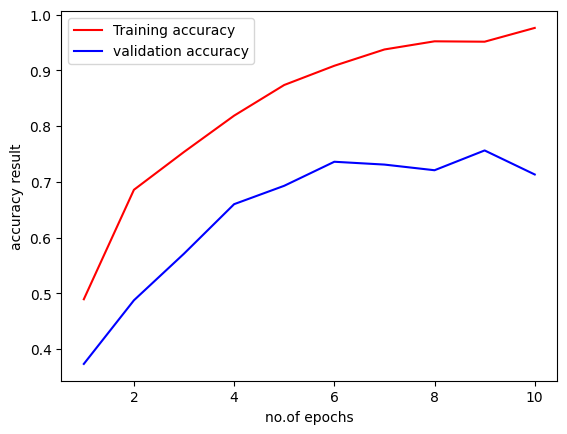

In [69]:
##accuracy visualization

epochs=[i for i in range(1,11)]
epochs
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("no.of epochs")
plt.ylabel("accuracy result")
plt.legend()
plt.show()

In [86]:
#some other metrics for model evaluation

class_name=testing_set.class_names
class_name

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [87]:
y_pred=model.predict(testing_set)
y_pred,y_pred.shape

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step


(array([[1.5076185e-05, 1.7760205e-01, 8.0853897e-01, 1.3843905e-02],
        [4.0896680e-02, 2.3833168e-01, 7.1908903e-01, 1.6826265e-03],
        [2.2334123e-09, 1.5306058e-03, 9.9846929e-01, 3.2859656e-08],
        ...,
        [5.1899104e-08, 1.2386558e-08, 3.1053079e-07, 9.9999964e-01],
        [4.6761043e-11, 2.8534274e-08, 5.9740737e-09, 1.0000000e+00],
        [6.1830622e-04, 1.8412085e-06, 3.2337692e-07, 9.9937952e-01]],
       dtype=float32),
 (394, 4))

In [88]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [89]:
predicted_categories

<tf.Tensor: shape=(394,), dtype=int64, numpy=
array([2, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 2,
       2, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [90]:
true_categories=tf.concat([y for x,y in testing_set],axis=0)
true_categories

<tf.Tensor: shape=(394, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [91]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(394,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [96]:
from sklearn.metrics import classification_report,confusion_matrix


In [93]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

    glioma_tumor       0.95      0.18      0.30       100
meningioma_tumor       0.79      0.86      0.82       115
        no_tumor       0.59      1.00      0.74       105
 pituitary_tumor       0.84      0.80      0.82        74

        accuracy                           0.71       394
       macro avg       0.79      0.71      0.67       394
    weighted avg       0.78      0.71      0.67       394



In [98]:
cm=confusion_matrix(y_true,predicted_categories)
print(cm)
cm.shape

[[ 18  25  49   8]
 [  1  99  12   3]
 [  0   0 105   0]
 [  0   2  13  59]]


(4, 4)

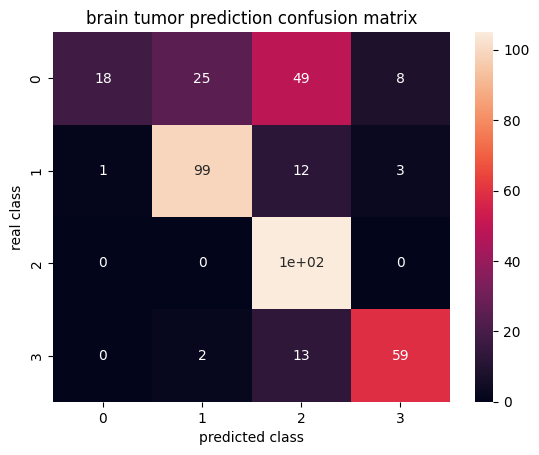

In [103]:
##confusionmatrix visualization

sns.heatmap(cm,annot=True)
plt.xlabel("predicted class")
plt.ylabel("real class")
plt.title("brain tumor prediction confusion matrix")
plt.show()


